<a href="https://colab.research.google.com/github/Nouhaila2002/sentiment_analysis/blob/main/day1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# installing the Kaggle library
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d vjchoudhary7/customer-segmentation-tutorial-in-python

  0% 0.00/1.55k [00:00<?, ?B/s]
100% 1.55k/1.55k [00:00<00:00, 4.28MB/s]


In [5]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = 'customer-segmentation-tutorial-in-python.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
df.shape

(200, 5)

In [11]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [12]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [13]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

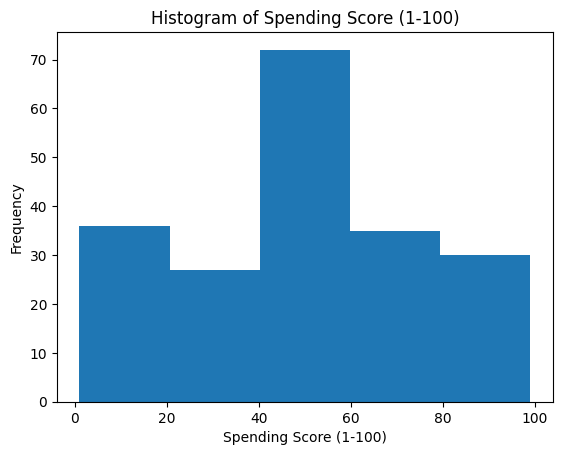

In [15]:
# Visualize the distribution of a numerical variable using a histogram
plt.hist(df['Spending Score (1-100)'], bins=5)
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')
plt.title('Histogram of Spending Score (1-100)')
plt.show()

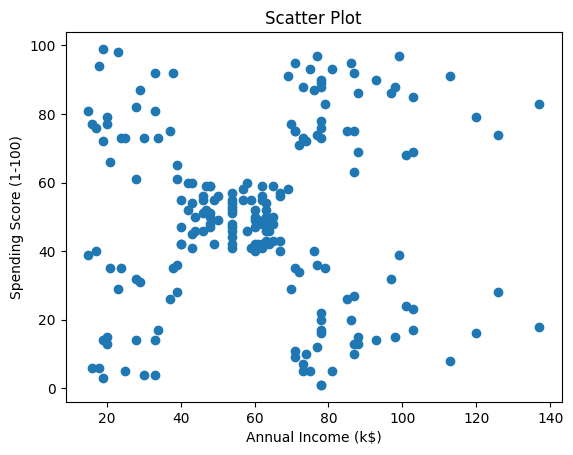

In [16]:
# Create a scatter plot to visualize the relationship between two numerical variables
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Scatter Plot')
plt.show()

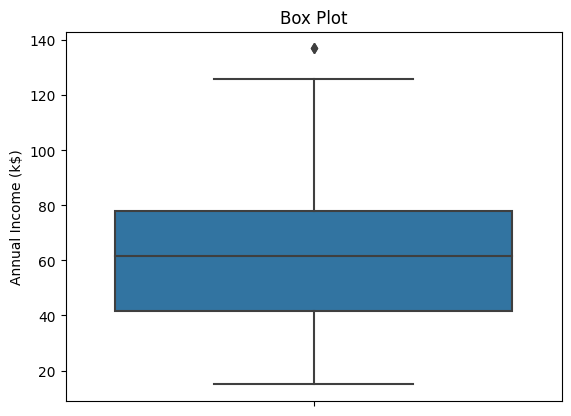

In [17]:
# Create a box plot to identify outliers in a numerical variable
sns.boxplot(y=df['Annual Income (k$)'])
plt.ylabel('Annual Income (k$)')
plt.title('Box Plot')
plt.show()

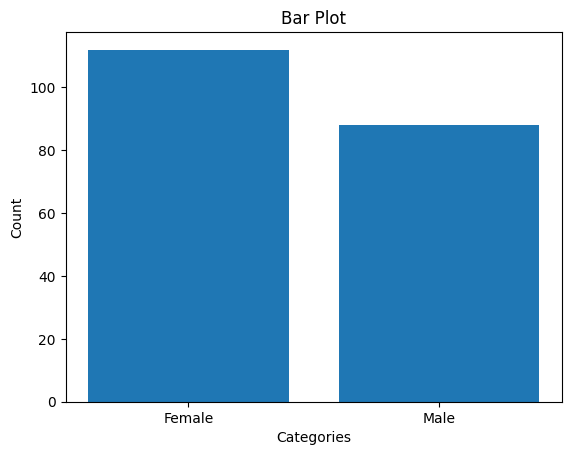

In [18]:
# Create a bar plot to visualize the distribution of a categorical variable
plt.bar(df['Gender'].value_counts().index, df['Gender'].value_counts().values)
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Bar Plot')
plt.show()

<ipython-input-19-d315b471f2b7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


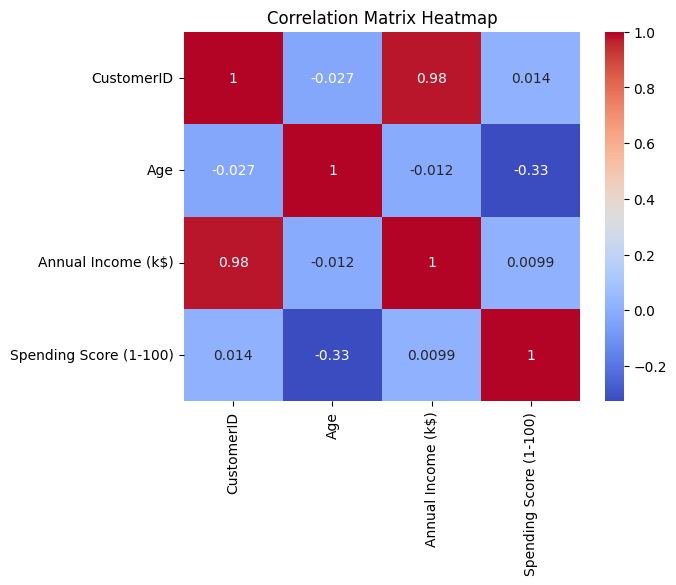

In [19]:
# Create a correlation matrix heatmap to explore the relationships between variables
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [20]:
# Map 'Male' to 0 and 'Female' to 1
gender_mapping = {'Male': 0, 'Female': 1}
df['Gender'] = df['Gender'].map(gender_mapping)

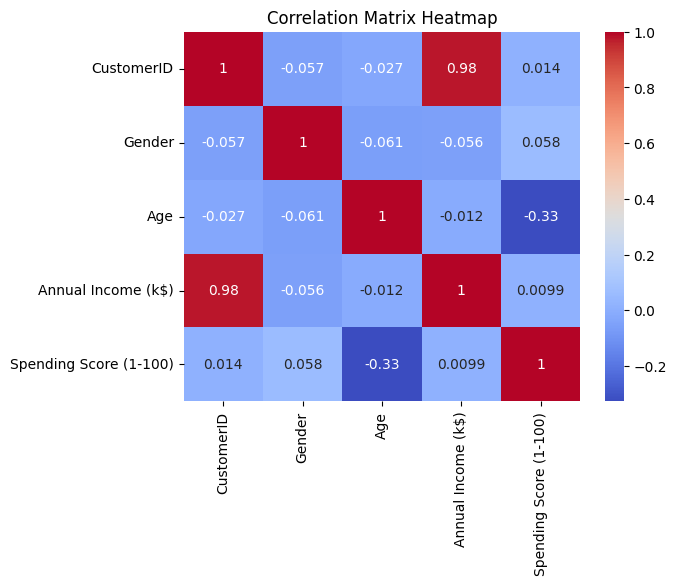

In [21]:
# Create a correlation matrix heatmap to explore the relationships between variables
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

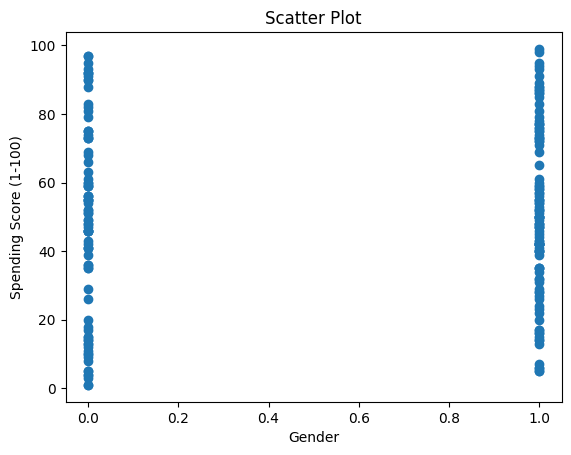

In [22]:
plt.scatter(df['Gender'], df['Spending Score (1-100)'])
plt.xlabel('Gender')
plt.ylabel('Spending Score (1-100)')
plt.title('Scatter Plot')
plt.show()

The box plot will display the distribution of the spending score for each gender category. It allows you to compare the median, quartiles, and potential outliers in the spending score distribution between genders. The plot will have two boxes (one for each gender), with whiskers indicating the range of non-outlier values.

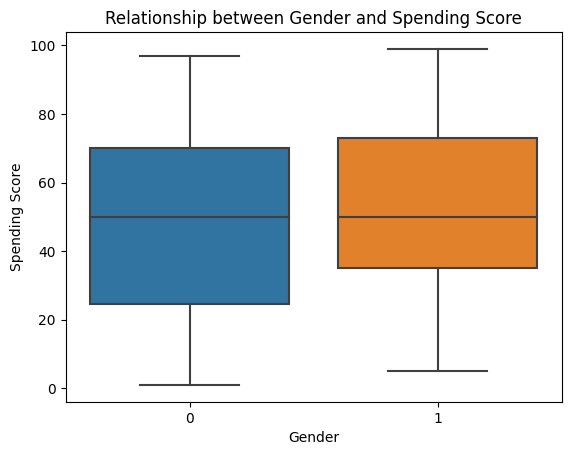

In [23]:
# Create a box plot to compare the spending score distribution between genders
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df)
plt.xlabel('Gender')
plt.ylabel('Spending Score')
plt.title('Relationship between Gender and Spending Score')
plt.show()

This bar plot shows the average spending score on the y-axis and the gender categories on the x-axis. It provides a straightforward visual comparison of the average spending score between genders.

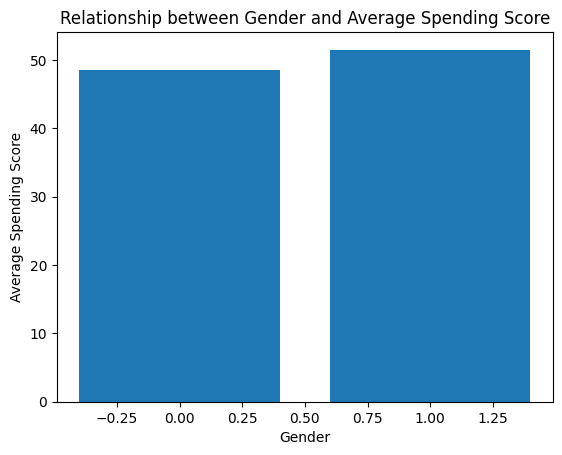

In [24]:
# create a bar plot to visualize the average spending score for each gender category

# Calculate the average spending score for each gender
avg_spending_score = df.groupby('Gender')['Spending Score (1-100)'].mean()

# Create a bar plot to compare the average spending score between genders
plt.bar(avg_spending_score.index, avg_spending_score.values)
plt.xlabel('Gender')
plt.ylabel('Average Spending Score')
plt.title('Relationship between Gender and Average Spending Score')
plt.show()

In [25]:
from sklearn.cluster import KMeans

In [26]:
# Select the relevant columns from your dataset
#the feature matrix
X = df[['Gender', 'Age', 'Annual Income (k$)','Spending Score (1-100)']]

In [27]:
# Create an instance of the clustering algorithm
kmeans = KMeans(n_clusters=3)  # Specify the desired number of clusters

In [28]:
# Fit the algorithm to the data and obtain the cluster labels
labels = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [29]:
# Access the cluster labels assigned to each data point
print(labels)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]


In [30]:
# Evaluate the quality of the clustering (if ground truth labels are available)
# using metrics such as silhouette score, adjusted Rand index, or homogeneity score
from sklearn.metrics import silhouette_score, adjusted_rand_score, homogeneity_score

The silhouette score measures the compactness and separation of the clusters, ranging from -1 to 1. A higher silhouette score indicates better-defined and well-separated clusters.
The adjusted Rand index (ARI) measures the similarity between the clustering results and the ground truth labels, ranging from -1 to 1. A higher ARI value indicates a better agreement between the clustering and the ground truth.

The homogeneity score measures the extent to which each cluster contains only samples from a single class, ranging from 0 to 1. A higher homogeneity score indicates better cluster purity.

These metrics can provide insights into the quality and validity of your clustering results, especially when ground truth labels are available for comparison. However, note that these metrics require the availability of ground truth information to evaluate the clustering performance accurately.

In [31]:
# Calculate the silhouette score
silhouette_avg = silhouette_score(X, labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.383798873822341


In [ ]:
# Assuming you have ground truth labels available in your dataset
#ground_truth_labels = df['ground_truth_labels']
# Calculate the adjusted Rand index
#rand_index = adjusted_rand_score(ground_truth_labels, labels)
#print("Adjusted Rand Index:", rand_index)

# Calculate the homogeneity score
#homogeneity = homogeneity_score(ground_truth_labels, labels)
#print("Homogeneity Score:", homogeneity)
#replace ground_truth_labels with the actual ground truth labels available in your dataset.



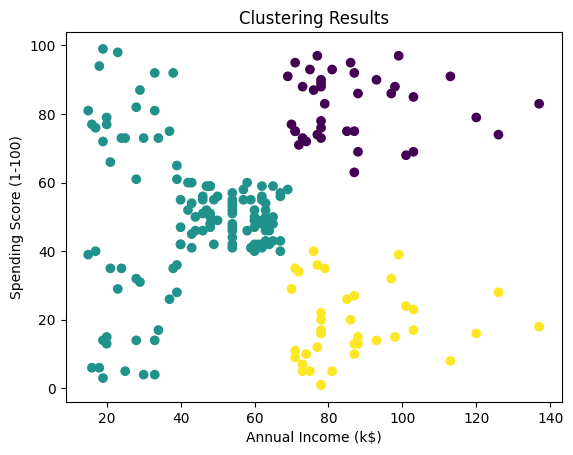

In [33]:
# Create a scatter plot to visualize the data points and their assigned clusters
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=labels)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clustering Results')
plt.show()

Iterate and fine-tune the clustering:
You can adjust the parameters of the clustering algorithm, such as the number of clusters, and rerun the steps to observe different clustering results. Additionally, you can evaluate and compare the performance of different clustering algorithms to find the most suitable one for your dataset.

In [34]:
from sklearn.model_selection import RandomizedSearchCV

Performing random search allows you to explore different values for the number of clusters and select the one that optimizes a chosen evaluation metric. Keep in mind that the optimal number of clusters may vary depending on the specific dataset and problem at hand, so it's recommended to experiment and validate the results based on domain knowledge or other evaluation techniques.

In [35]:
# Define the parameter grid for random search
param_grid = {'n_clusters': np.arange(2, 10)}

# Create an instance of the KMeans algorithm
kmeans = KMeans()
#The n_iter parameter specifies the number of random combinations to try
#The cv parameter determines the number of cross-validation folds used for evaluation
# Perform random search using cross-validation
random_search = RandomizedSearchCV(kmeans, param_distributions=param_grid, n_iter=5, cv=5)

# Fit the random search to the data
random_search.fit(X)

# Get the best number of clusters
best_n_clusters = random_search.best_params_['n_clusters']
print("Best number of clusters:", best_n_clusters)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Best number of clusters: 9


In [39]:
# Create an instance of the clustering algorithm
kmeans = KMeans(n_clusters=9)  # Specify the desired number of clusters

# Fit the algorithm to the data and obtain the cluster labels
labels = kmeans.fit_predict(X)

# Calculate the silhouette score
silhouette_avg = silhouette_score(X, labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.38523516592376744


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Feature selection is an important step in machine learning to identify the most relevant features from your dataset. It helps reduce dimensionality, improve model performance, and enhance interpretability. Here are a few common approaches for feature selection:

Univariate Feature Selection:

Use statistical tests such as chi-square, ANOVA, or mutual information to quantify the relationship between each feature and the target variable. Select the features with the highest scores.
Scikit-learn provides the SelectKBest class and related methods for univariate feature selection.
Recursive Feature Elimination (RFE):

Train a model (e.g., a linear regression or a support vector machine) on the full feature set and rank the features based on their importance.
Eliminate the least important feature(s) and repeat the process until the desired number of features is reached.
Scikit-learn provides the RFE class and related methods for recursive feature elimination.
Feature Importance from Tree-Based Models:

Train a tree-based model (e.g., random forest or gradient boosting) and use the feature importance scores provided by the model.
Select the most important features based on the scores.
Scikit-learn provides the feature_importances_ attribute in many tree-based models for this purpose.
L1 Regularization (Lasso):

Apply L1 regularization to a linear model (e.g., linear regression or logistic regression).
The regularization process shrinks the coefficients of irrelevant features towards zero, effectively eliminating them.
Scikit-learn provides the Lasso class and related methods for L1 regularization-based feature selection.
SelectFromModel:

Train a model and use a specific threshold to select features based on their importance or coefficients.
Scikit-learn provides the SelectFromModel class that allows you to set a threshold for feature selection.
It's important to note that feature selection techniques should be applied with caution and in combination with other techniques like cross-validation and domain knowledge. It's recommended to evaluate the impact of feature selection on model performance and consider the trade-off between the number of selected features and the desired level of interpretability.

Scikit-learn offers various feature selection methods and tools that can be helpful in implementing these techniques. You can refer to the scikit-learn documentation for more details and specific examples on feature selection: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection

In a clustering problem, feature selection can be approached slightly differently compared to traditional supervised learning problems. Since clustering is an unsupervised learning task where there is no predefined target variable, the focus is on selecting features that effectively capture the underlying patterns or structure in the data. Here are a few techniques that can be useful for feature selection in clustering problems:

Variance Threshold:

Calculate the variance of each feature and remove the features with low variances.
Features with low variance typically have little discriminatory power in clustering.
Correlation Analysis:

Analyze the pairwise correlations between features and remove highly correlated features.
Highly correlated features may contain redundant information and can be safely discarded.
Dimensionality Reduction:

Apply dimensionality reduction techniques like Principal Component Analysis (PCA) or t-distributed Stochastic Neighbor Embedding (t-SNE).
These techniques transform the original features into a lower-dimensional space while preserving the important structural information.
Clustering-Specific Feature Importance:

Use clustering-specific metrics like within-cluster sum of squares (WCSS) or silhouette scores to assess the importance of each feature.
Features that contribute significantly to the clustering quality can be considered important and retained.
Domain Knowledge and Interpretability:

Consider domain knowledge and interpretability to select features relevant to the problem.
Expert understanding of the data and its characteristics can guide the selection of meaningful features for clustering.
It's worth noting that feature selection in clustering is often combined with the clustering algorithm itself. Depending on the clustering algorithm being used, some methods may inherently perform feature selection as part of their optimization process.

Remember that feature selection in clustering is exploratory, and it is important to experiment with different feature subsets and evaluate the impact on clustering performance and interpretability. The specific approach for feature selection in clustering can vary depending on the dataset, the clustering algorithm, and the goals of the analysis.



The silhouette score is a metric commonly used to evaluate the quality of clustering results. However, it is not typically used to assess the importance of individual features directly. Instead, the silhouette score measures the compactness and separation of the clusters as a whole.

To use the silhouette score to evaluate the quality of clustering results, you need to calculate it for different clustering solutions with varying feature subsets. Here's an example workflow:

Select a subset of features to evaluate:

Start by choosing a subset of features from your dataset.
You can use a feature selection method or expert knowledge to determine the initial feature subset.
Perform clustering with the selected feature subset:

Apply a clustering algorithm (e.g., K-means) to cluster the data using the selected features.
Calculate the silhouette score:

Compute the silhouette score for the clustering results.
The silhouette score ranges from -1 to 1, where higher values indicate better-defined and well-separated clusters.
Repeat steps 1-3 for different feature subsets:

Iterate the process by selecting different feature subsets, either by adding or removing features.
Calculate the silhouette score for each clustering solution.
Compare the silhouette scores:

Compare the silhouette scores obtained from different feature subsets.
Identify the feature subsets that yield higher silhouette scores, indicating better clustering quality.
By repeating this process for multiple feature subsets, you can assess the impact of different features on clustering performance. Features that consistently contribute to higher silhouette scores across various feature subsets can be considered more important in capturing the underlying cluster structure.

Remember that the silhouette score assesses the clustering quality globally and doesn't provide a direct measure of feature importance. It helps guide feature selection by evaluating the overall clustering performance for different feature subsets. Additional techniques, such as domain knowledge and feature-specific analysis, may be required to assess the importance of individual features in a clustering context.

***************************************************************


Build predictive models to forecast customer behavior, such as purchase likelihood, customer lifetime value, or churn probability. Utilize classification or regression algorithms, such as logistic regression, decision trees, or random forests.(Predictive Analytics)